C:\Users\tirth\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tirth\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Revenue Share Percentage (%)')

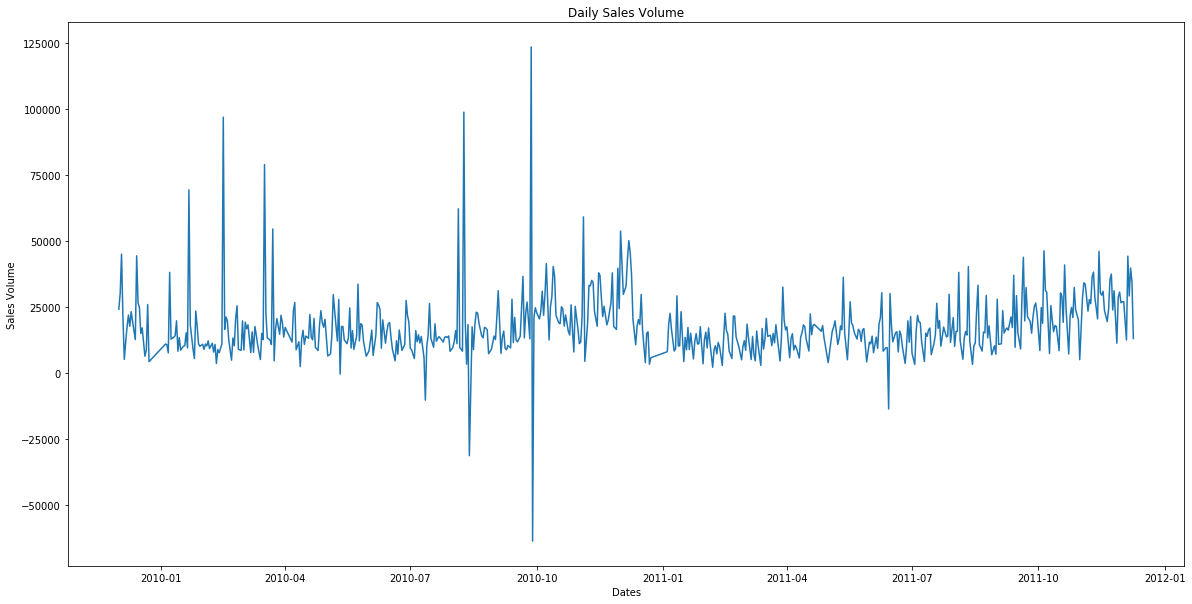

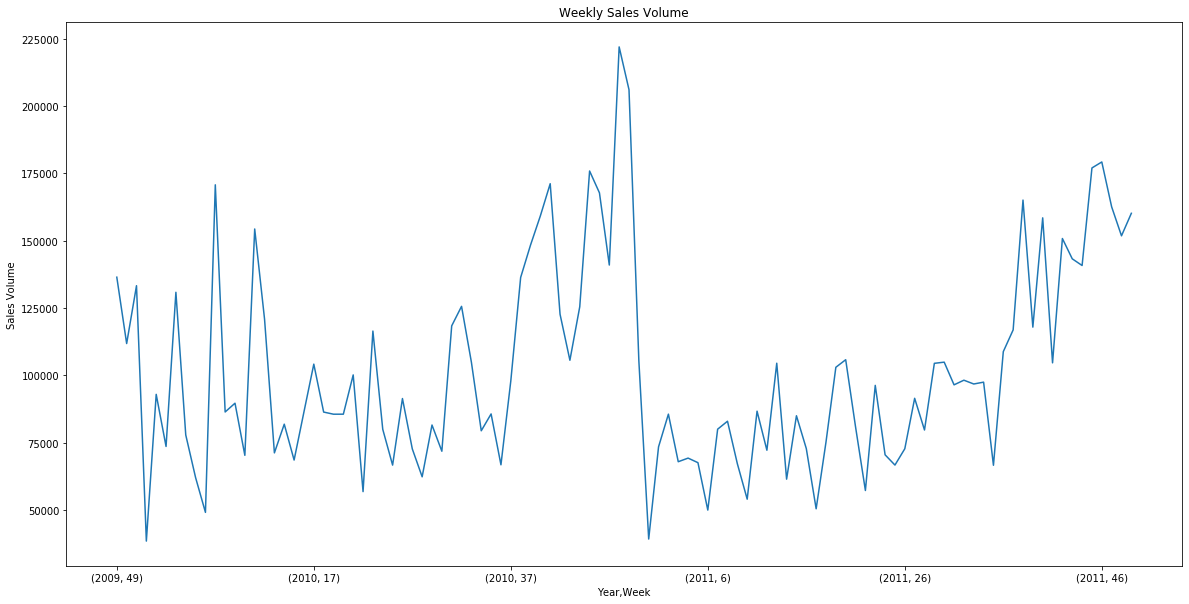

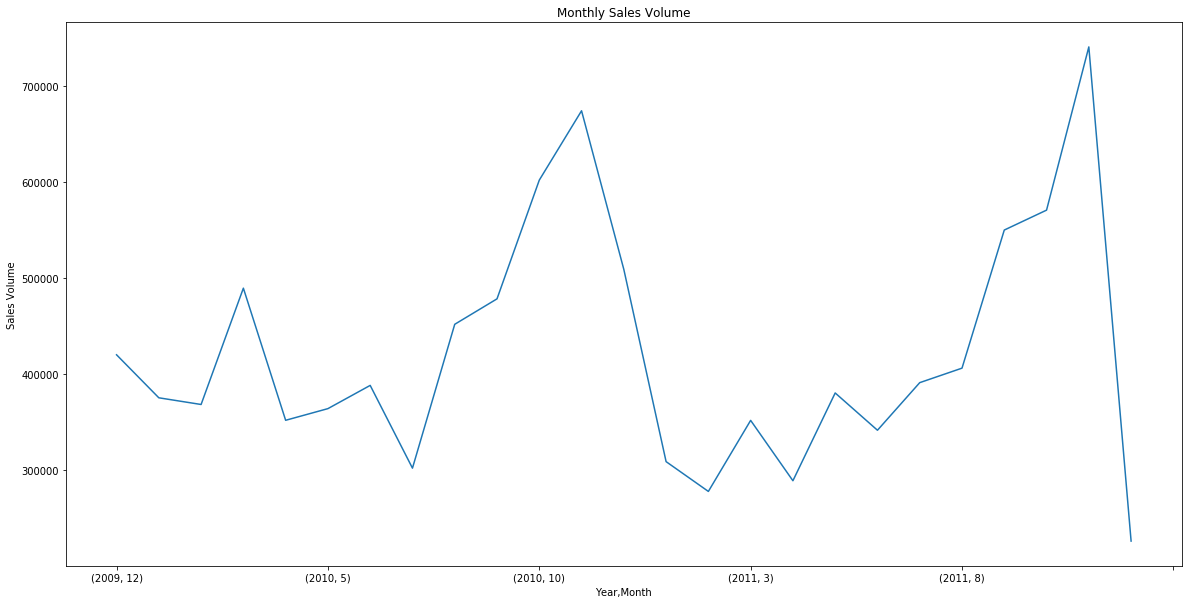

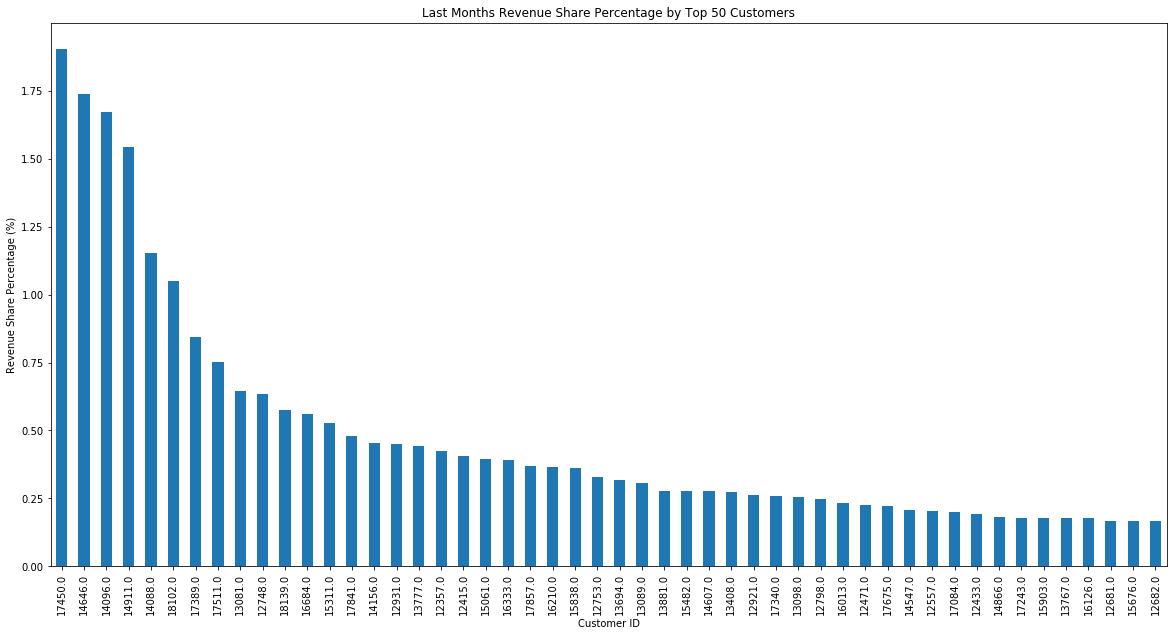

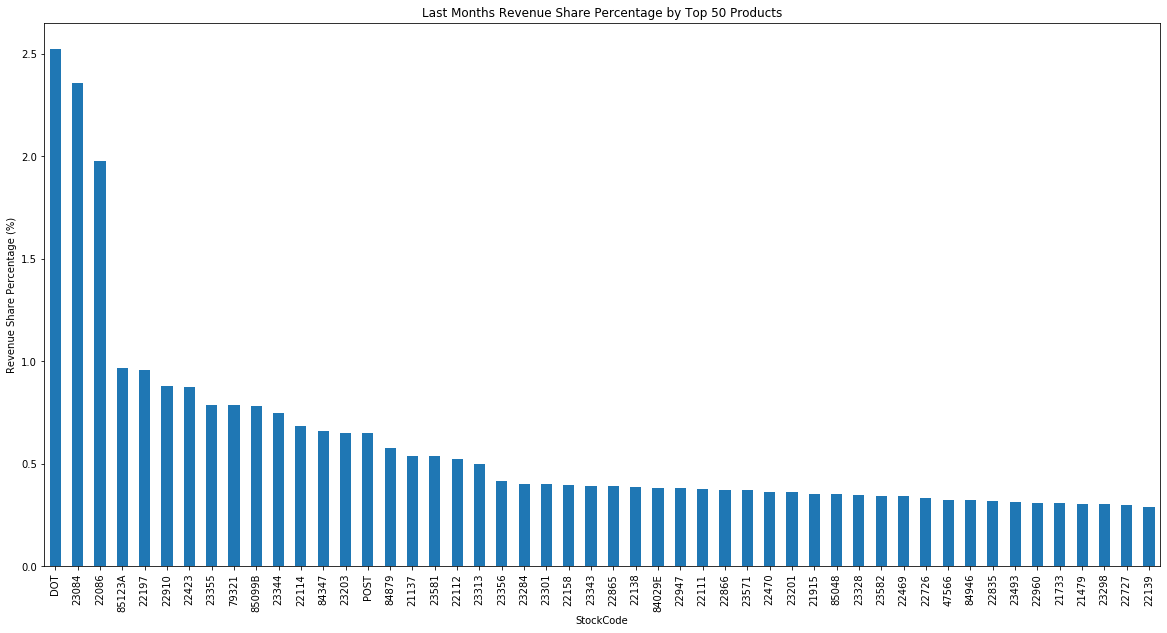

In [79]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sales_data = pd.read_csv("C:/Users/tirth/OneDrive/Desktop/Data Science Test/online_retail_II.csv")

sales_data['Dates'] = pd.to_datetime(sales_data['InvoiceDate']).dt.date
sales_data['Times'] = pd.to_datetime(sales_data['InvoiceDate']).dt.time
sales_data['Year'] = pd.to_datetime(sales_data['InvoiceDate']).dt.year
sales_data['Month'] = pd.to_datetime(sales_data['InvoiceDate']).dt.month
sales_data['Week'] = pd.to_datetime(sales_data['InvoiceDate']).dt.week

daily_sales = sales_data.groupby(["Dates"])["Quantity"].sum()

weekly_sales = sales_data.groupby(["Year", "Week"])["Quantity"].sum()

monthly_sales = sales_data.groupby(["Year", "Month"])["Quantity"].sum()

last_month_data = sales_data.loc[(sales_data["Year"] == 2011) & (sales_data["Month"] == 11)]
last_month_data['Revenue'] = last_month_data['Price'] * last_month_data['Quantity']
last_month_data['Revenue Share'] = (last_month_data['Revenue'] * 100) / last_month_data['Revenue'].sum()

customer_index = last_month_data.set_index('Customer ID')
customer_revenue = customer_index.sum(level='Customer ID')
customer_revenue_share_top20 = customer_revenue.nlargest(50, 'Revenue Share')
customer_revenue_share_top20_group = customer_revenue_share_top20['Revenue Share']

product_index = last_month_data.set_index('StockCode')
product_revenue = product_index.sum(level='StockCode')
product_revenue_share_top20 = product_revenue.nlargest(50, 'Revenue Share')
product_revenue_share_top20_group = product_revenue_share_top20['Revenue Share']

plt.figure(1)
ax1 = daily_sales.plot(figsize=[20,10], title='Daily Sales Volume')
ax1.set_ylabel("Sales Volume")
plt.figure(2)
ax2 = weekly_sales.plot(figsize=[20,10], title='Weekly Sales Volume')
ax2.set_ylabel("Sales Volume")
plt.figure(3)
ax3 = monthly_sales.plot(figsize=[20,10], title='Monthly Sales Volume')
ax3.set_ylabel("Sales Volume")
plt.figure(4)
ax4 = customer_revenue_share_top50_group.plot.bar(figsize=[20,10], title='Last Months Revenue Share Percentage by Top 50 Customers')
ax4.set_ylabel("Revenue Share Percentage (%)")
plt.figure(5)
ax5 = product_revenue_share_top50_group.plot.bar(figsize=[20,10], title='Last Months Revenue Share Percentage by Top 50 Products')
ax5.set_ylabel("Revenue Share Percentage (%)")

